#### Required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from scipy.stats import multivariate_normal

# Add the parent directory of simpleparameterisation to the sys.path list
sys.path.append('../simpleparamaterisation/')

# Now you can import simpleparameterisation from the new location
import TPCevt as TPC

det = TPC.Detector("Simple TPC with Atmospheric Ar (default values)")


Welcome to JupyROOT 6.28/00


In [2]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('open', 152),
 ('TPC', 72),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('det', 56),
 ('multivariate_normal', 56)]

#### Programs

In [3]:

pitch_x = 0.4
pitch_y = 0.4
det.PSFstd = 10

rv = multivariate_normal([0,0], np.diag([det.PSFstd, det.PSFstd]))

Define the function

In [4]:
pitch_x = 0.4
pitch_y = 0.4
det.PSFstd = 10

rv = multivariate_normal([0,0], np.diag([det.PSFstd, det.PSFstd]))

def getDistribution_pdf(grid_size, offset):
    x, y = np.mgrid[-grid_size*pitch_x:(grid_size+1)*pitch_x:pitch_x,
            -grid_size*pitch_y:(grid_size+1)*pitch_y:pitch_y
            ]
    offset_x, offset_y = offset
    pos = np.stack((x-offset_x, y-offset_y), axis =-1)
    gain = np.random.exponential(scale=det.gain_mean)

    gain=1 #not considering gain effect for temporary
    
    val_pdf = rv.pdf(pos)*gain*pitch_x*pitch_y

    plt.figure()
    plt.title('Val PDF')
    plt.scatter(x, y, c=val_pdf)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.colorbar()
    return x, y, val_pdf


In [5]:
pitch_x = 0.4
pitch_y = 0.4
det.PSFstd = 1

rv = multivariate_normal([0,0], np.diag([det.PSFstd, det.PSFstd]))

def getDistribution_cdf(grid_size, offset):
        x, y = np.mgrid[-grid_size*pitch_x:(grid_size+1)*pitch_x:pitch_x,
                -grid_size*pitch_y:(grid_size+1)*pitch_y:pitch_y
                ]
        offset_x, offset_y = offset
        # pos = np.stack((x-offset_x, y-offset_y), axis =-1)
        gain = np.random.exponential(scale=det.gain_mean)
        top_right = np.stack((np.array([x+pitch_x/2-offset_x, y+pitch_y/2-offset_y])), axis=-1)
        bottom = np.stack((np.array([x+pitch_x/2-offset_x, y-pitch_y/2-offset_y])), axis=-1)
        left = np.stack((np.array([x-pitch_x/2-offset_x, y+pitch_y/2-offset_y])), axis=-1)
        bottom_left = np.stack((np.array([x-pitch_x/2-offset_x, y-pitch_y/2-offset_y])), axis=-1)

        # gain=1 #not considering gain effect for temporary

        val_cdf = (rv.cdf(top_right) - rv.cdf(bottom) - rv.cdf(left) + rv.cdf(bottom_left))*gain

        plt.figure()
        plt.title('Val CDF')
        plt.scatter(x, y, c=val_cdf)
        plt.xlim(-5, 5)
        plt.ylim(-5, 5)
        plt.colorbar()
        return x, y, val_cdf


Let's create 2 Distribution for this example

In [6]:
DriftedE

coord_1 = np.array([0.9, 0.3])
pitch_x = 0.4
pitch_y = 0.4

(index_x, offset_x) = getGridProps(coord_1[0], pitch_x)
print('index_x: ', index_x,', offset_x: ',  offset_x)

(index_y, offset_y) = getGridProps(coord_1[1], pitch_y)
print('index_y: ', index_y,', offset_y: ',  offset_y)

x_1, y_1, readout_1 = getDistribution_cdf(10, [offset_x, offset_y])

NameError: name 'DriftedE' is not defined

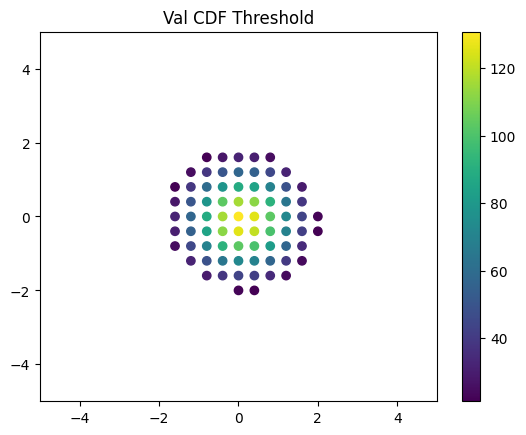

In [ ]:

def applyThreshold(x_1, y_1, readout_1, thresh):
    mask_1 = readout_1 >= thresh
    x_1_filtered = x_1[mask_1].flatten()
    y_1_filtered = y_1[mask_1].flatten()
    readout_1_filtered = readout_1[mask_1]
    return x_1_filtered, y_1_filtered, readout_1_filtered

thresh = 20
x_1_filtered, y_1_filtered, readout_1_filtered = applyThreshold(x_1, y_1, readout_1, thresh)
plt.figure()
plt.title('Val CDF Threshold')
plt.scatter(x_1_filtered, y_1_filtered, c=readout_1_filtered)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.colorbar()

x_1_filtered [-1.6 -1.6 -1.6 -1.6 -1.6 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -0.8 -0.8
 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4
 -0.4 -0.4  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.4  0.4
  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.8  0.8  0.8  0.8  0.8  0.8
  0.8  0.8  0.8  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.6  1.6  1.6
  1.6  1.6  1.6  2.   2. ]
x_1_filtered transformed [-8.00000000e-01 -8.00000000e-01 -8.00000000e-01 -8.00000000e-01
 -8.00000000e-01 -4.00000000e-01 -4.00000000e-01 -4.00000000e-01
 -4.00000000e-01 -4.00000000e-01 -4.00000000e-01 -4.00000000e-01
  2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
  2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
  2.22044605e-16  4.00000000e-01  4.00000000e-01  4.00000000e-01
  4.00000000e-01  4.00000000e-01  4.00000000e-01  4.00000000e-01
  4.00000000e-01  4.00000000e-01  8.00000000e-01  8.00000000e-01
  8.00000000e-01  8.00000000e-01  8.00000000e-01  8.00000000

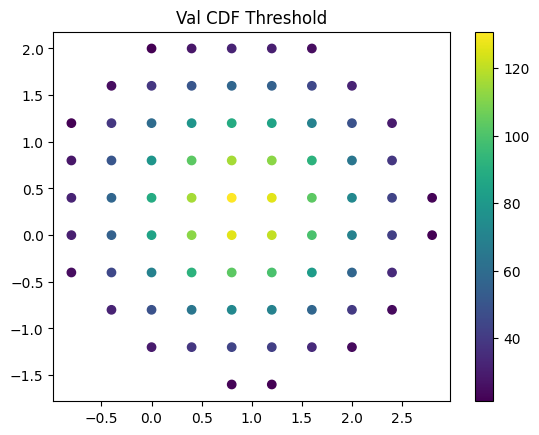

In [ ]:
print('x_1_filtered', x_1_filtered)
x_1_filtered += index_x*pitch_x
y_1_filtered += index_y*pitch_y

print('x_1_filtered transformed', x_1_filtered)
plt.figure()
plt.title('Val CDF Threshold')
plt.scatter(x_1_filtered, y_1_filtered, c=readout_1_filtered)
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
plt.colorbar()

### Dist 1

index_x:  2 , offset_x:  0.09999999999999998
index_y:  11 , offset_y:  -0.10000000000000053


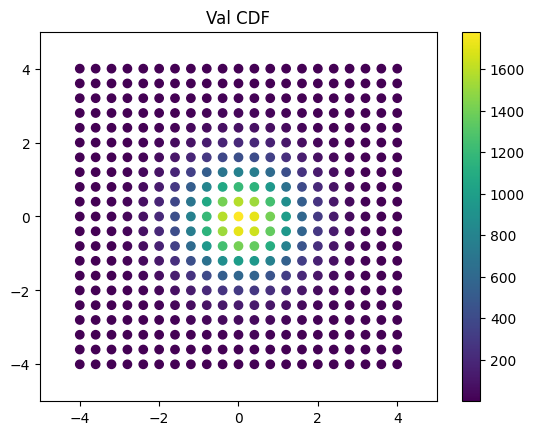

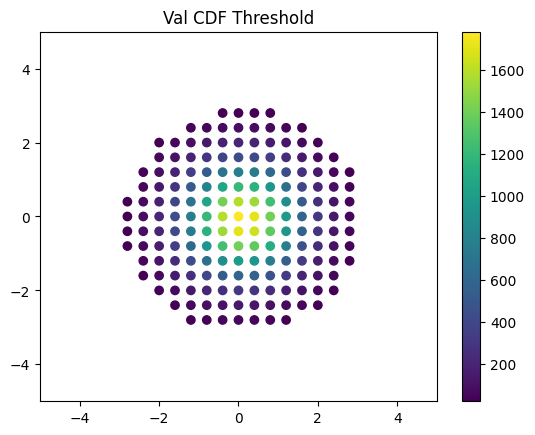

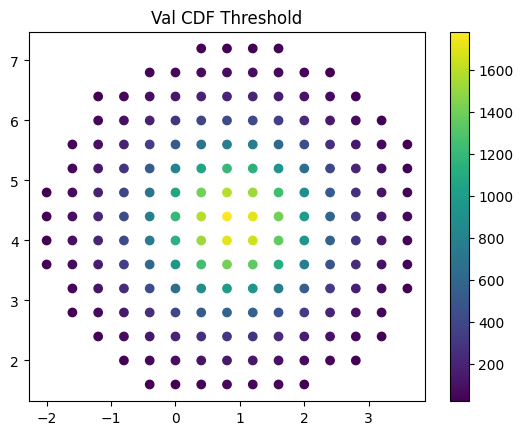

In [ ]:
def getGridProps(coord, delta):
    index = int((coord + delta / 2) // delta)
    offset = coord - index*delta
    return index, offset

coord_1 = np.array([0.9, 4.3])
pitch_x = 0.4
pitch_y = 0.4

(index_x, offset_x) = getGridProps(coord_1[0], pitch_x)
print('index_x: ', index_x,', offset_x: ',  offset_x)

(index_y, offset_y) = getGridProps(coord_1[1], pitch_y)
print('index_y: ', index_y,', offset_y: ',  offset_y)

x_1, y_1, readout_1 = getDistribution_cdf(10, [offset_x, offset_y])



def applyThreshold(x_1, y_1, readout_1, thresh):
    mask_1 = readout_1 >= thresh
    x_1_filtered = x_1[mask_1].flatten()
    y_1_filtered = y_1[mask_1].flatten()
    readout_1_filtered = readout_1[mask_1]
    return x_1_filtered, y_1_filtered, readout_1_filtered

thresh = 20
x_1_filtered, y_1_filtered, readout_1_filtered = applyThreshold(x_1, y_1, readout_1, thresh)
plt.figure()
plt.title('Val CDF Threshold')
plt.scatter(x_1_filtered, y_1_filtered, c=readout_1_filtered)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.colorbar()


x_1_filtered += index_x*pitch_x
y_1_filtered += index_y*pitch_y
plt.figure()
plt.title('Val CDF Threshold')
plt.scatter(x_1_filtered, y_1_filtered, c=readout_1_filtered)
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
plt.colorbar()

### Dist 2

index_x:  7 , offset_x:  0.09999999999999964
index_y:  3 , offset_y:  0.09999999999999987


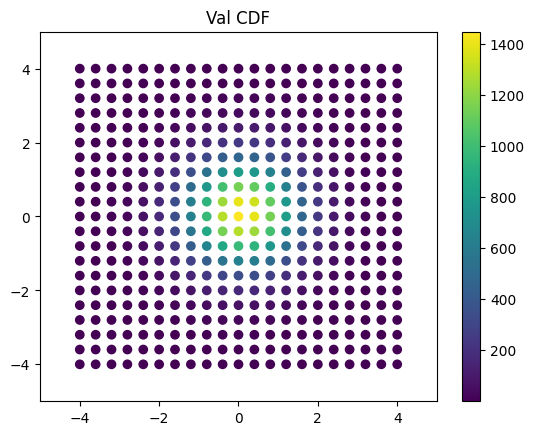

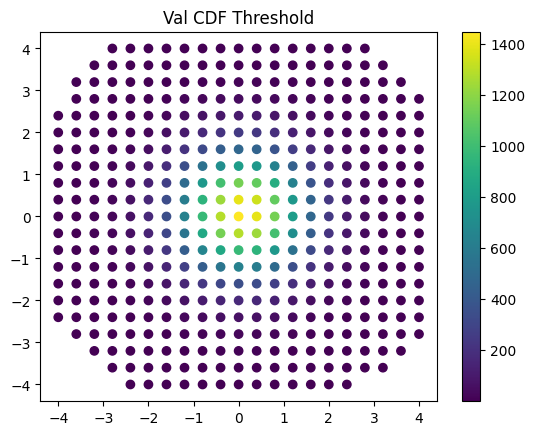

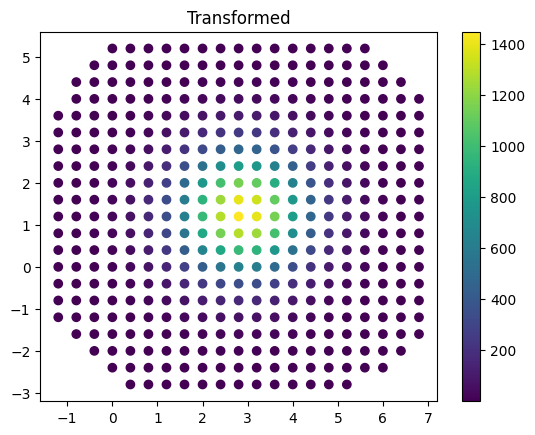

In [ ]:

coord_2 = np.array([2.9, 1.3])
pitch_x = 0.4
pitch_y = 0.4

(index_x, offset_x) = getGridProps(coord_2[0], pitch_x)
print('index_x: ', index_x,', offset_x: ',  offset_x)

(index_y, offset_y) = getGridProps(coord_2[1], pitch_y)
print('index_y: ', index_y,', offset_y: ',  offset_y)

x_2, y_2, readout_1 = getDistribution_cdf(10, [offset_x, offset_y])



thresh = 0.01
x_2_filtered, y_2_filtered, readout_2_filtered = applyThreshold(x_2, y_2, readout_1, thresh)
plt.figure()
plt.title('Val CDF Threshold')
plt.scatter(x_2_filtered, y_2_filtered, c=readout_2_filtered)
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
plt.colorbar()

x_2_filtered += index_x*pitch_x
y_2_filtered += index_y*pitch_y
plt.figure()
plt.title('Transformed')
plt.scatter(x_2_filtered, y_2_filtered, c=readout_2_filtered)
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
plt.colorbar()


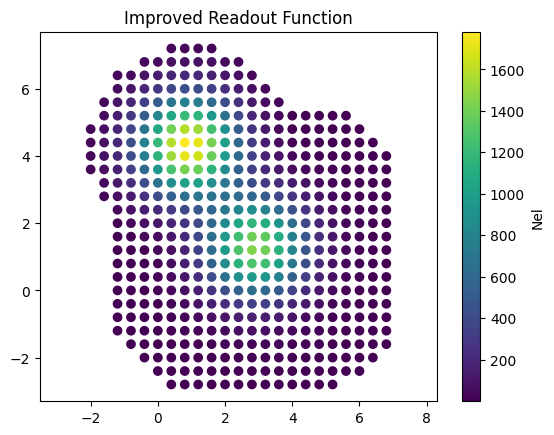

In [ ]:
CombinedEvt = {}
def count_decimal_places(number):
    if "." not in str(number):
        return 0
    return len(str(number).split(".")[1])

comma_num_x = count_decimal_places(pitch_x)
comma_num_y = count_decimal_places(pitch_y)
# print(comma_num)


def combineData(x, y, val):
    for i in range(len(x)):
        key = (np.around(x[i], comma_num_x), np.around(y[i], comma_num_y))
        if key in CombinedEvt:
            # print('initial', CombinedEvt[key])
            CombinedEvt[key] += val[i]
            # print('final', CombinedEvt[key])
        else:
            CombinedEvt[key] = val[i]

def plotReadout(ReadoutEvt):
    plt.figure()
    plt.title('Improved Readout Function')
    plt.axis('equal')
    plt.scatter(ReadoutEvt[0], ReadoutEvt[1], c = ReadoutEvt[2])
    plt.colorbar().set_label('Nel')

combineData(x_2_filtered, y_2_filtered, readout_2_filtered)
combineData(x_1_filtered, y_1_filtered, readout_1_filtered)

x_comb, y_comb = zip(*CombinedEvt.keys())
val_comb = list(CombinedEvt.values())
plotReadout(np.array([x_comb, y_comb, val_comb]))
# filtered_coord = filterCoord(x_comb, y_comb, val_comb, minvals, maxvals)